## Train a dataset from Interface 2018/12 with Fast.ai library

In [2]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
np.warnings.filterwarnings('ignore')
np.random.seed(1001)

import os
import sys
import shutil
from pathlib import Path

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')
%matplotlib inline

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
# Download dataset
! wget https://github.com/yasudakn/umaibar/raw/master/interface-201812-umaibar-data-content.zip
! mkdir -p interface-201812-umaibar-data-content
! unzip -q interface-201812-umaibar-data-content.zip
! mv data-content interface-201812-umaibar-data-content
! rm interface-201812-umaibar-data-content.zip

--2018-10-25 18:46:02--  https://github.com/yasudakn/umaibar/raw/master/interface-201812-umaibar-data-content.zip
Resolving github.com (github.com)... 192.30.255.112, 192.30.255.113
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yasudakn/umaibar/master/interface-201812-umaibar-data-content.zip [following]
--2018-10-25 18:46:03--  https://raw.githubusercontent.com/yasudakn/umaibar/master/interface-201812-umaibar-data-content.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.108.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21043355 (20M) [application/zip]
Saving to: ‘interface-201812-umaibar-data-content.zip’

interface-201812-um 100%[===================>]  20.07M  10.7MB/s    in 1.9s    

2018-10-25 18:46:06 (10.7 MB/s) - ‘int

In [3]:
folder = 'work_fastai_if201812'
PATH = Path('./interface-201812-umaibar-data-content/data-content')
sz = 224
arch = vgg16
bs = 16

In [4]:
data = ImageClassifierData.from_paths(PATH, bs=bs, val_name='test', tfms=tfms_from_model(arch, sz))
classes = data.classes

In [5]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [6]:
model = nn.Sequential(*children(arch(pre=True))[:-2],
                      nn.Conv2d(512, len(data.classes), 3, padding=1), 
                      nn.AdaptiveAvgPool2d(1), Flatten(), 
                      nn.LogSoftmax())
learn = ConvLearner.from_model_data(model, data)
learn.freeze_to(-4)

In [7]:
learn.fit(1e-2, 10)

epoch      trn_loss   val_loss   accuracy                  
    0      11.837828  10.304409  0.1       
    1      8.848464   5.379168   0.210526                  
    2      7.256807   7.71918    0.184211                  
    3      5.5018     4.644987   0.389474                  
    4      3.631853   2.621692   0.452632                  
    5      2.390046   3.719932   0.515789                  
    6      2.30455    2.546535   0.442105                  
    7      1.868808   4.253623   0.463158                  
    8      1.822921   2.43677    0.594737                  
    9      2.316688   3.449246   0.457895                  



[3.449245982421072, 0.45789473684210524]

In [8]:
learn.precompute=False
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      1.700264   1.094688   0.673684  



[1.094687859635604, 0.6736842124085677]

In [9]:
learn.unfreeze()
lr=np.array([1e-2/25]*34 + [1e-2/5]*8 + [1e-2]*4)
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      2.320741   1.158485   0.757895  



[1.1584845091167248, 0.7578947377832312]

In [10]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.786299   0.418161   0.889474  
    1      0.800458   1.174713   0.784211                  
    2      0.448201   0.388643   0.931579                  
    3      0.53849    1.914263   0.773684                  
    4      0.370735   0.603901   0.894737                  
    5      0.225208   0.325112   0.921053                  
    6      0.11563    0.302021   0.915789                  



[0.3020212471485138, 0.9157894761938797]

In [11]:
learn.fit(lr, 3, cycle_len=3)

epoch      trn_loss   val_loss   accuracy                    
    0      0.177686   1.515258   0.842105  
    1      0.195673   0.402023   0.931579                  
    2      0.084388   0.402791   0.921053                   
    3      0.103773   0.722854   0.878947                   
    4      0.069627   0.276068   0.926316                   
    5      0.031594   0.279393   0.926316                   
    6      0.021012   0.379078   0.910526                   
    7      0.013099   0.258767   0.942105                   
    8      0.016654   0.263509   0.942105                   



[0.2635091129102205, 0.942105265667564]

In [12]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs,y)

0.9421052631578948

 65%|██████▍   | 31/48 [00:05<00:02,  5.76it/s, loss=0.0247]


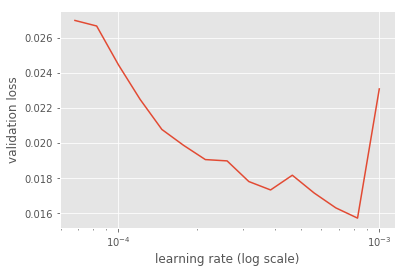

In [61]:
learn.lr_find(end_lr=1e-1)#start_lr=1e-4, end_lr=1)
learn.sched.plot()

## Visualize results

TTA for 5 preds.                             
test/burger/P1040733_half.JPG


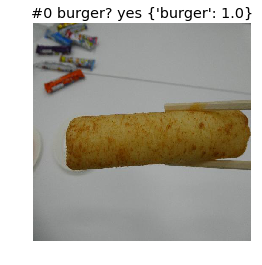

test/burger/P1040719_half.JPG


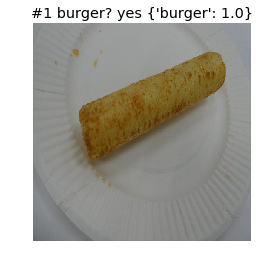

test/burger/IMG_20180718_185231_half.jpg


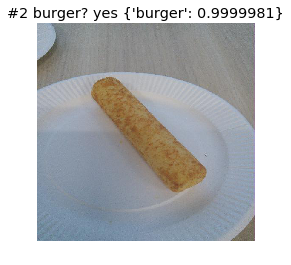

test/burger/IMG_20180718_185110_half.jpg


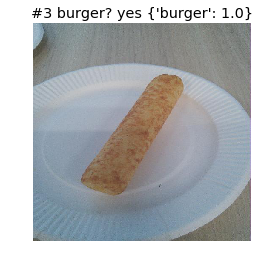

test/burger/P1040758_half.JPG


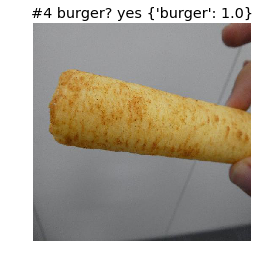

test/burger/IMG_20180718_185022_half.jpg


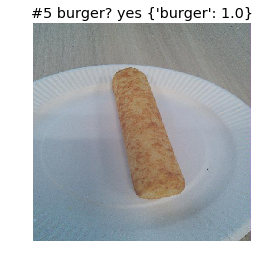

test/burger/P1040744_half.JPG


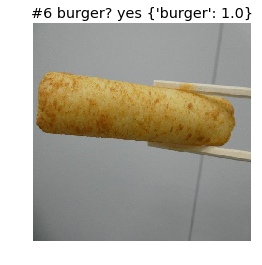

test/burger/P1040751_half.JPG


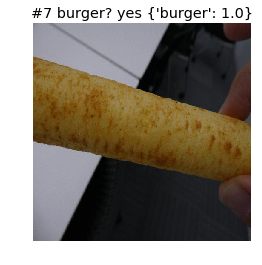

test/burger/P1040740_half.JPG


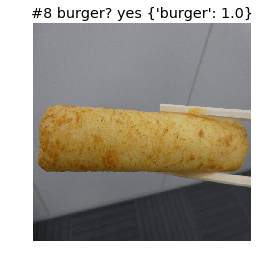

test/burger/P1040745_half.JPG


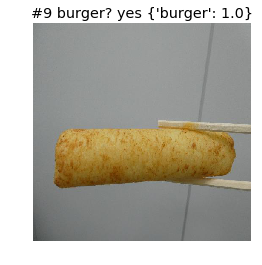

test/cheese/P1040494_half.JPG


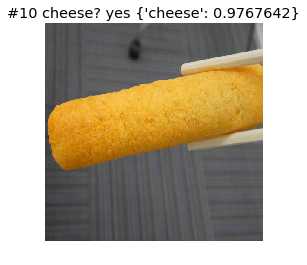

test/cheese/IMG_20180718_190619_half.jpg


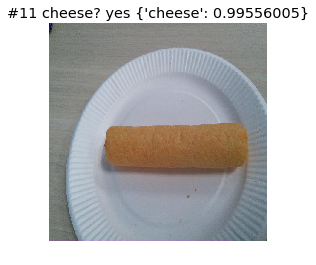

test/cheese/P1050315_half.JPG


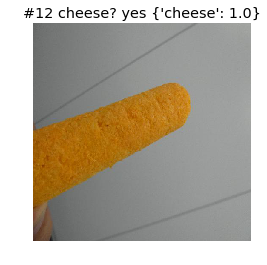

test/cheese/P1050341_half.JPG


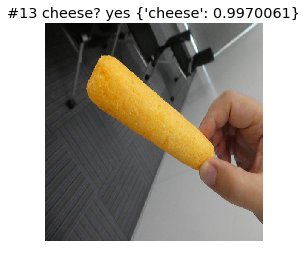

test/cheese/P1050298_half.JPG


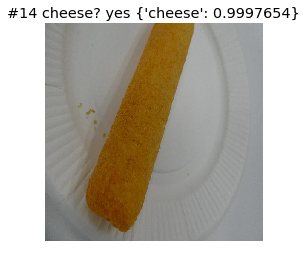

test/cheese/P1040495_half.JPG


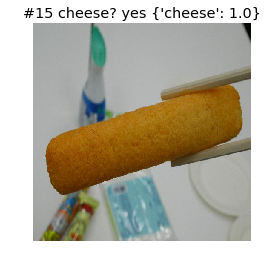

test/cheese/P1040485_half.JPG


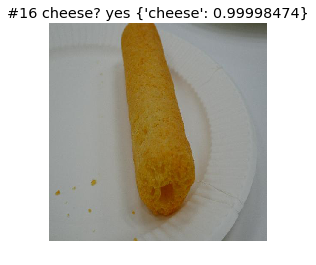

test/cheese/P1050337_half.JPG


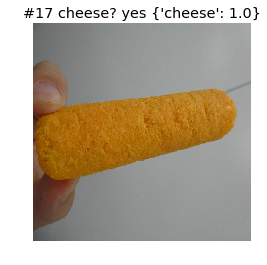

test/cheese/P1050322_half.JPG


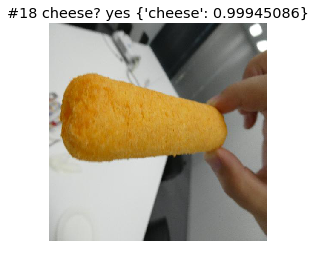

test/cheese/IMG_20180718_190513_half.jpg


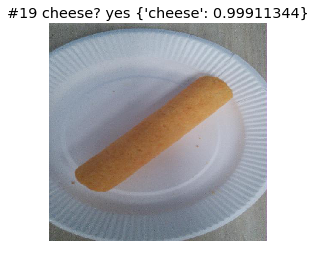

test/chicken_curry/P1040290_half.JPG


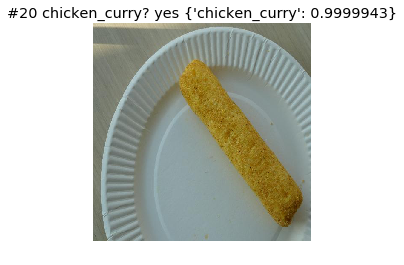

In [13]:
def tta_log_preds_to_probs(log_preds):
    probs = np.exp(log_preds)
    if len(log_preds.shape) == 3: # TTA to get mean
        print('TTA for {} preds.'.format(log_preds.shape[0]))
        probs = np.mean(probs, axis=0)
    return probs

if True:
    log_preds, y = learn.TTA()
    preds = tta_log_preds_to_probs(log_preds)
    results = np.argmax(preds, axis=1)
    fnames  = data.val_ds.fnames
    for no, (fname, result, ref, pred) in enumerate(zip(fnames, results, y, preds)):
        plt.imshow(PIL.Image.open(PATH/fname))
        plt.axis('off')
        print(fname)
        plt.title('#%d %s? %s %s' % (no, classes[result], 'yes' if result == ref else 'no',
                                     str({classes[i]:pred[i] for i in [result]})))
        plt.show()
        if no >= 20: break # too many

## Visualize more by CAM

In [14]:
m = learn.model
m

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNor

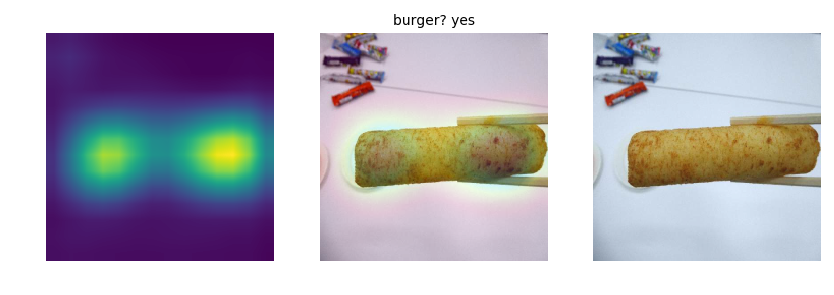

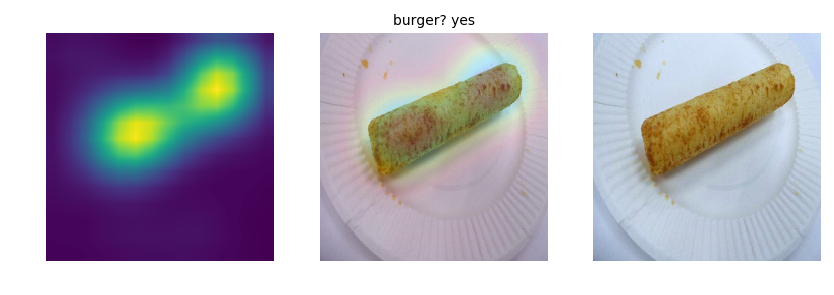

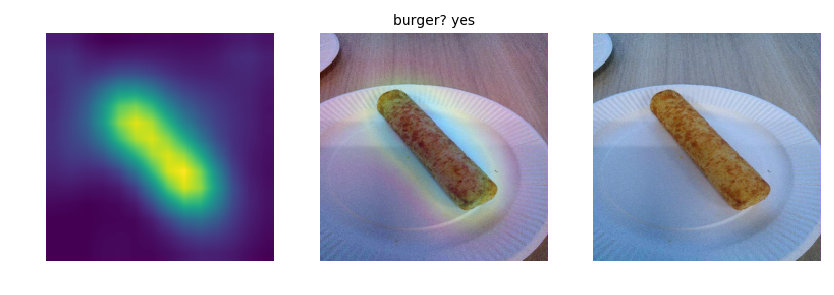

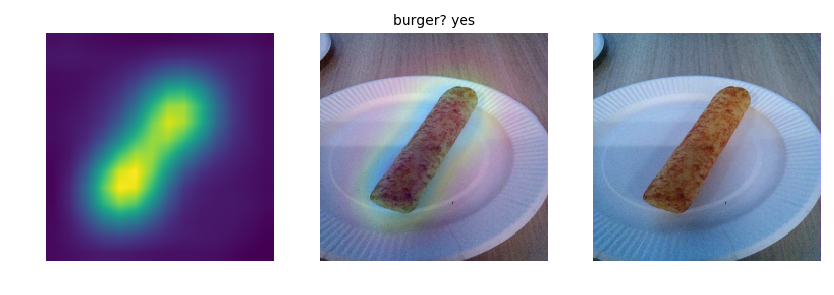

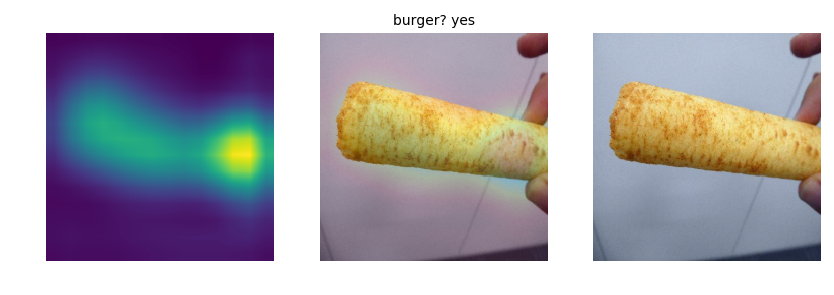

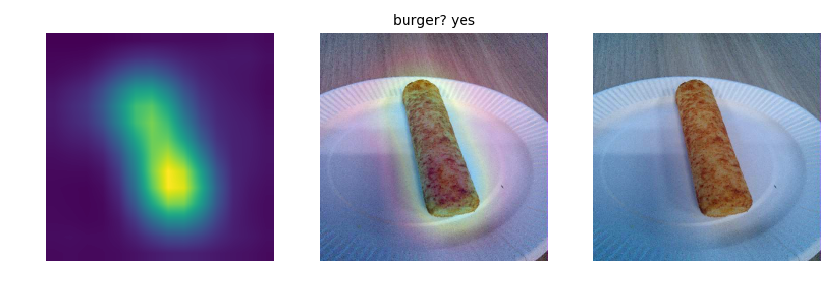

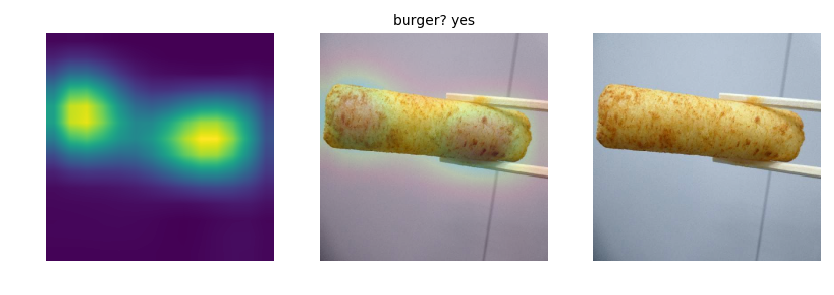

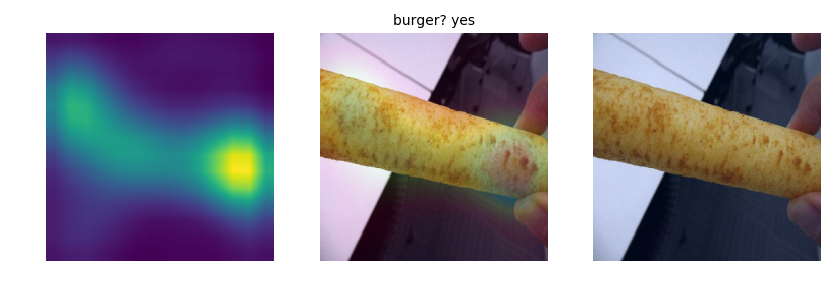

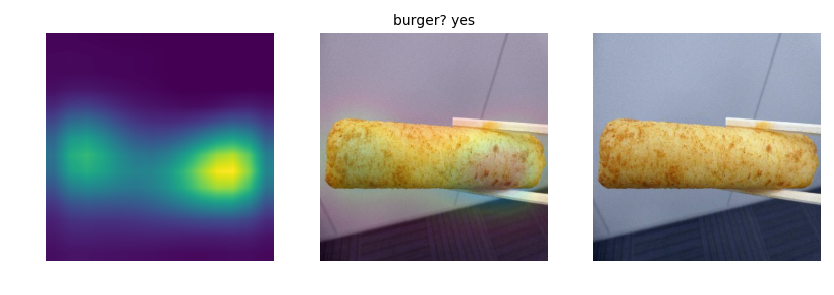

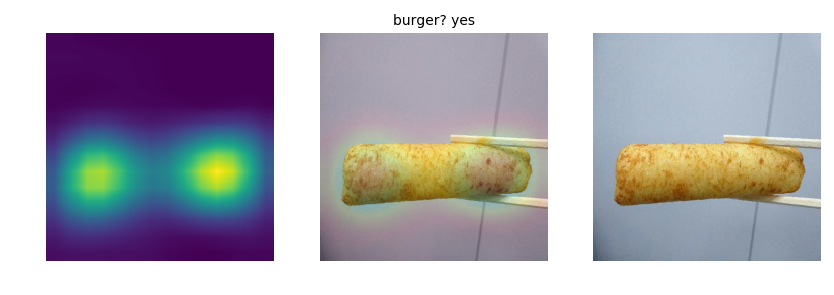

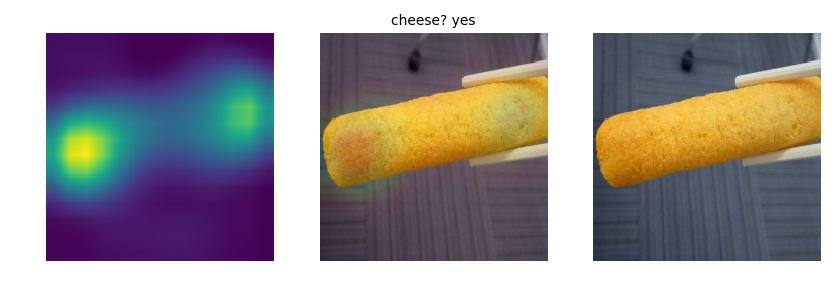

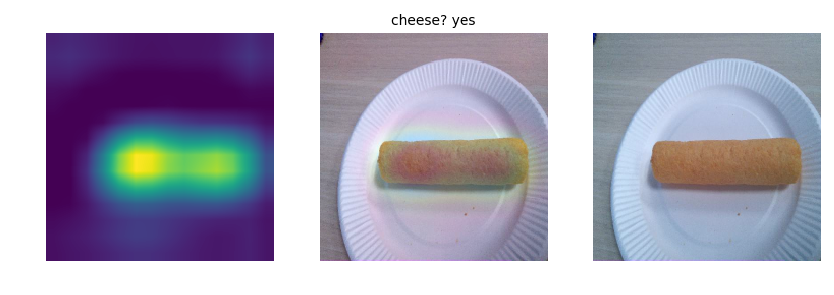

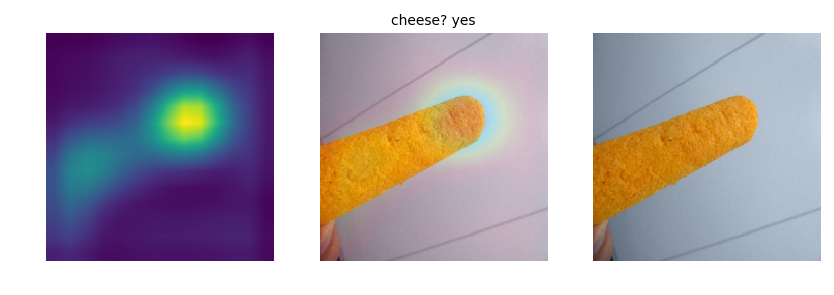

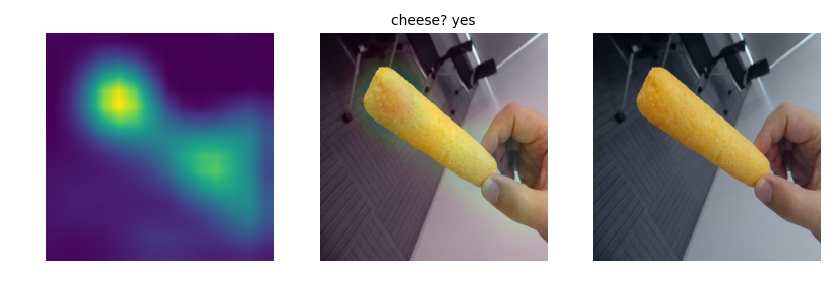

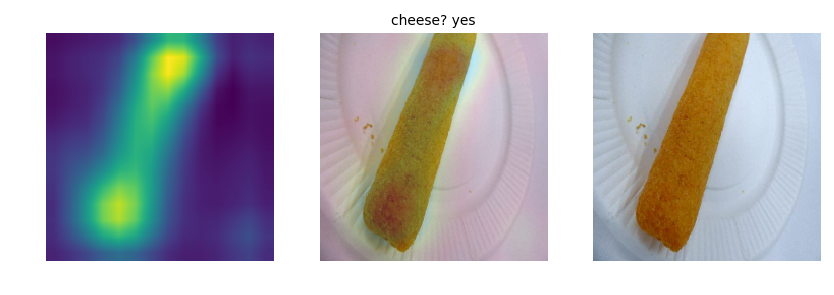

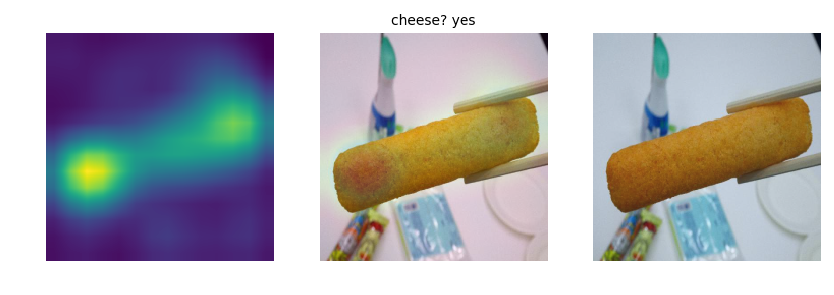

In [15]:
import cv2

class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = output
    def remove(self): self.hook.remove()

def imshow_friendly(img):
    img_temp = img - np.min(img)
    img_temp = img_temp/np.max(img_temp)
    friendly = np.uint8(255 * img_temp)
    return friendly

import warnings
warnings.simplefilter('ignore')

xx, yy = next(iter(data.val_dl))
for test_file_index in range(len(yy)):
    x, y = xx[test_file_index, ...], yy[test_file_index, ...]
    x, y = x[np.newaxis, ...], y[np.newaxis, ...]
    last_conv = -4
    sfs = [SaveFeatures(o) for o in [m[last_conv-9], m[last_conv-6], m[last_conv-3], m[last_conv]]]
    py = m(x) #Variable(torch.from_numpy(x).float().to("cuda:0")))
    for o in sfs: o.remove()
    py = np.exp(to_np(py)[0])
    targ_class = np.argmax(py)
    result = data.val_ds.get_y(test_file_index)

    feat = np.maximum(0, to_np(sfs[3].features[0]))
    f2 = np.rollaxis(feat, 0, 3)[..., targ_class]
    f2 -= f2.min()
    f2 /= f2.max()
    heatmap = f2

    img = np.rollaxis(to_np(x[0]), 0, 3)
    fig = plt.figure(figsize=(10, 5), dpi=100)
    ax = fig.add_subplot(131)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    ax.set_axis_off()
    ax.matshow(heatmap)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = ((heatmap*0.5/np.max(heatmap) + img)) / 1.5
    ax = fig.add_subplot(132)
    ax.set_axis_off()
    ax.imshow(imshow_friendly(superimposed))
    ax.set_title('%s? %s' % (classes[targ_class], 'yes' if result == targ_class else 'no'), fontsize=10)
    ax = fig.add_subplot(133)
    ax.set_axis_off()
    ax.imshow(imshow_friendly(img))
    fig.show()